<a href="https://colab.research.google.com/github/anupbagale/Image_Processing/blob/main/Noises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [57]:
image=cv2.imread('/content/drive/MyDrive/image_processing_lab/leena_img.png',0)

## Salt and pepper noise

In [58]:

# Function to add salt and pepper noise
def s_n_p(img):
    # Create a copy of the image
    noisy_img = img.copy()
    row, col = img.shape

    # Add salt (white pixels)
    n_p_1 = np.random.randint(100, 2000)
    for _ in range(n_p_1):
        x = np.random.randint(0, row)
        y = np.random.randint(0, col)
        noisy_img[x, y] = 255

    # Add pepper (black pixels)
    n_p_2 = np.random.randint(100, 2000)
    for _ in range(n_p_2):
        x = np.random.randint(0, row)
        y = np.random.randint(0, col)
        noisy_img[x, y] = 0

    return noisy_img

# Add noise to the image
noisy_img = s_n_p(image)


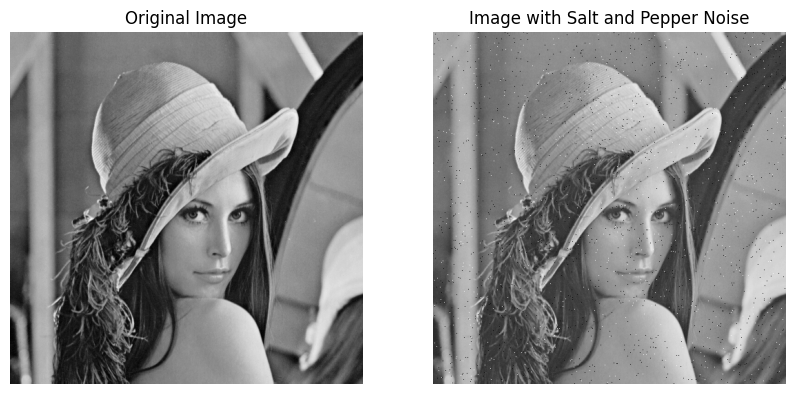

In [59]:
# Plot the original and noisy images
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title('Image with Salt and Pepper Noise')
plt.axis('off')

plt.show()

### Gaussian Noise

In [60]:
mean = 0
std_dev = 25  # Standard deviation controls the noise intensity

# Generate Gaussian noise
gaussian_noise = np.random.normal(mean, std_dev, image.shape).astype('float32')

# Add Gaussian noise to the image
noisy_image = image + gaussian_noise

# Clip the values to keep them in range [0, 255]
noisy_image = np.clip(noisy_image, 0, 255).astype('uint8')


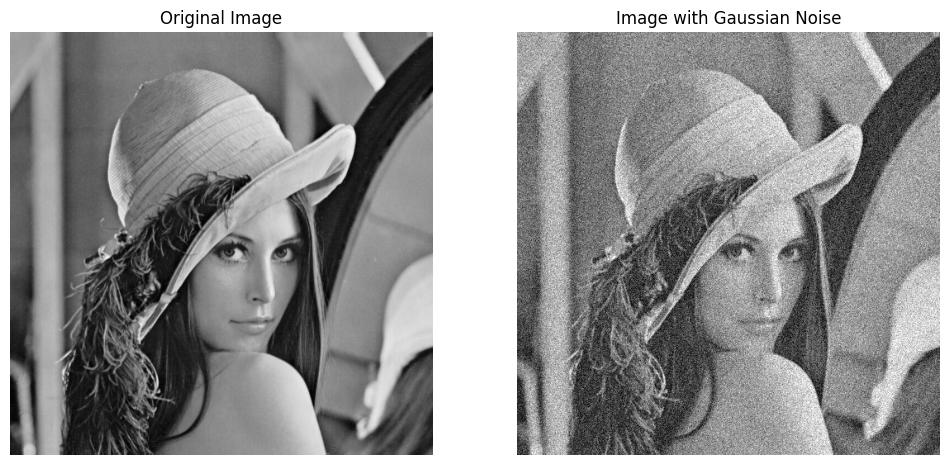

In [61]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Image with Gaussian Noise')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.show()


### Speckle Noise

In [62]:
# Normalize the image to [0, 1] for computation
normalized_image = image.astype(np.float32)/255

mean = 0
std_dev = 0.1

# Generate speckle noise
gaussian_noise = np.random.normal(mean, std_dev, normalized_image.shape).astype(np.float32)

# Add speckle noise (image * noise)
speckle_noise_image = normalized_image + normalized_image * gaussian_noise

# Clip to [0, 1] and convert back to [0, 255]
speckle_noise_image = np.clip(speckle_noise_image, 0, 1)
speckle_noise_image = (speckle_noise_image * 255).astype(np.uint8)

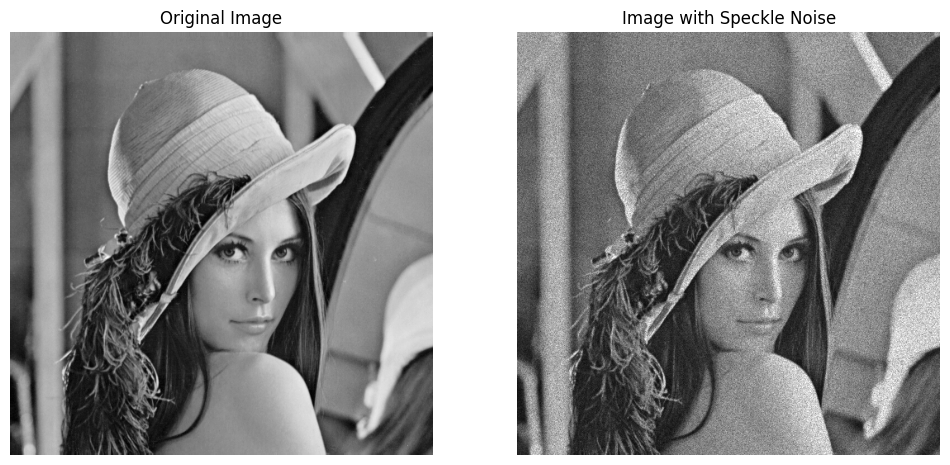

In [63]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Image with Speckle Noise')
plt.imshow(speckle_noise_image, cmap='gray')
plt.axis('off')

plt.show()